This notebook objective is to create a neural network without the need of using any ML or deep learning framework such as TensorFlow or Pytorch.

This notebook is inspired from Micheal Nielson book NeuralNetworksAndDeepLearning.com and the Learning Deep Learning book and other ressources. This wouldn't be called a project if I only took the pre-existing python files and copy pasted them. So I made a neural networks with my own code, of course the same concept with some slight changes, but this code deviates from those pre-existing popular codes of neural networks.

It was not easy writing all of this notebook and certainly debugging it wasn't, so I hope you read through it and enjoy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
X, y = mnist["data"], mnist["target"]
train_images, test_images, train_labels, test_labels = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
X_train = train_images.reshape(60000, 784)
mean = np.mean(X_train)
stddev = np.std(X_train)
X_train = (X_train - mean) / stddev
X_test = test_images.reshape(10000, 784)
X_test = (X_test - mean) / stddev

In [5]:
y_train = np.zeros((60000, 10))
y_test = np.zeros((10000, 10))
for i, y in enumerate(train_labels):
    y_train[i][int(y)] = 1
for i, y in enumerate(test_labels):
    y_test[i][int(y)] = 1
index_list = list(range(len(X_train)))

In [6]:
np.random.seed(7)
LEARNING_RATE = 0.01 #Learning Rate
EPOCHS = 20

In [7]:
def layer_weights_init(number_of_neurons, number_of_inputs):
    w_matrix = np.zeros((number_of_neurons, number_of_inputs+1)) #the +1 is for the bias weight
    for i in range(number_of_neurons):
        for j in range(1,(number_of_inputs+1)):
            w_matrix[i][j]=np.random.uniform(-0.1, 0.1)
    return w_matrix

We are creating a neural network with 4 layers

One input layer, One output layer
Two hidden layers

In [8]:
W_1 = layer_weights_init(25, 784)
R_1 = np.zeros(25)
Error_1 = np.zeros(25)

W_Out = layer_weights_init(10, 25)
R_Out = np.zeros(10)
Error_Out = np.zeros(10)

In [9]:
def feedforward(x):
    global R_1
    global R_Out
    for i, w in enumerate(W_1):
        z = np.dot(w,x)
        R_1[i] = np.tanh(z)
    R_1_array = np.concatenate((np.array([1.0]), R_1))
    for i, w in enumerate(W_Out):
        z = np.dot(w,R_1_array)
        R_Out[i] = 1.0 / (1.0 + np.exp(-z))

def backpropagation(y_real):
    global Error_1
    global Error_Out
    for i, y in enumerate(R_Out):
        Loss_derivative = -(y_real[i] -y)
        sigmoid_prime = y * (1.0-y)
        Error_Out[i] = Loss_derivative * sigmoid_prime
    for i, y in enumerate(R_1):
        error_weights = []
        for w in W_Out:
            error_weights.append(w[i+1])
        error_weight_array = np.array(error_weights)
        derivative = 1.0 - y**2 
        weighted_error = np.dot(error_weight_array, Error_Out)
        Error_1[i] = weighted_error * derivative


def adjust_weights(x):
    global W_Out
    global W_1
    for i, error in enumerate(Error_1):
        W_1[i] -= (x * LEARNING_RATE * error)
    R_1_array = np.concatenate(
        (np.array([1.0]), R_1))
    for i, error in enumerate(Error_Out):
        W_Out[i] -= (R_1_array * LEARNING_RATE * error)

In [10]:
chart_x = []
chart_y_train = []
chart_y_test = []
def show_learning(epoch_no, train_acc, test_acc):
    global chart_x
    global chart_y_train
    global chart_y_test
    print('epoch no:', epoch_no, ', train_acc: ',
          '%6.4f' % train_acc,
          ', test_acc: ', '%6.4f' % test_acc)    
    chart_x.append(epoch_no + 1)
    chart_y_train.append(1.0 - train_acc)
    chart_y_test.append(1.0 - test_acc)
def plot_learning():
    plt.plot(chart_x, chart_y_train, 'r-', label='training error')
    plt.plot(chart_x, chart_y_test, 'b-', label='test error')
    plt.axis([0, len(chart_x), 0.0, 1.0])
    plt.xlabel('training epochs')
    plt.ylabel('error')
    plt.legend()
    plt.show()

random shit gooooooo

epoch no: 0 , train_acc:  0.8563 , test_acc:  0.9157
epoch no: 1 , train_acc:  0.9203 , test_acc:  0.9240
epoch no: 2 , train_acc:  0.9275 , test_acc:  0.9266
epoch no: 3 , train_acc:  0.9326 , test_acc:  0.9302
epoch no: 4 , train_acc:  0.9351 , test_acc:  0.9322
epoch no: 5 , train_acc:  0.9381 , test_acc:  0.9321
epoch no: 6 , train_acc:  0.9404 , test_acc:  0.9336
epoch no: 7 , train_acc:  0.9425 , test_acc:  0.9372
epoch no: 8 , train_acc:  0.9439 , test_acc:  0.9345
epoch no: 9 , train_acc:  0.9462 , test_acc:  0.9375
epoch no: 10 , train_acc:  0.9468 , test_acc:  0.9345
epoch no: 11 , train_acc:  0.9478 , test_acc:  0.9374
epoch no: 12 , train_acc:  0.9488 , test_acc:  0.9381
epoch no: 13 , train_acc:  0.9498 , test_acc:  0.9360
epoch no: 14 , train_acc:  0.9507 , test_acc:  0.9391
epoch no: 15 , train_acc:  0.9510 , test_acc:  0.9391
epoch no: 16 , train_acc:  0.9517 , test_acc:  0.9376
epoch no: 17 , train_acc:  0.9527 , test_acc:  0.9376
epoch no: 18 , train_acc:  0.9537 , te

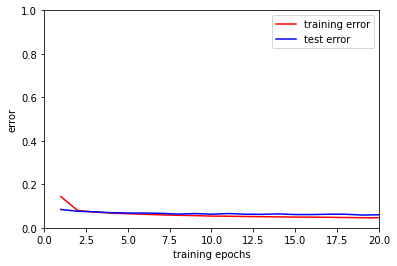

In [11]:
# Network training loop.
for i in range(EPOCHS): # Train EPOCHS iterations
    np.random.shuffle(index_list) # Randomize order
    correct_training_results = 0
    for j in index_list: # Train on all examples
        x = np.concatenate((np.array([1.0]), X_train[j]))
        feedforward(x)
        if R_Out.argmax() == y_train[j].argmax():
            correct_training_results += 1
        backpropagation(y_train[j])
        adjust_weights(x)
        
    correct_test_results = 0
    for j in range(len(X_test)): # Evaluate network
        x = np.concatenate((np.array([1.0]), X_test[j]))
        feedforward(x)
        if R_Out.argmax() == y_test[j].argmax():
            correct_test_results += 1
    show_learning(i, correct_training_results/len(X_train),
                correct_test_results/len(X_test))
plot_learning()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee693355-e352-45ea-bd8a-cce77b5db4b4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>